<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/RNN/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu -U

     |████████████████████████████████| 320.4MB 49kB/s 


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

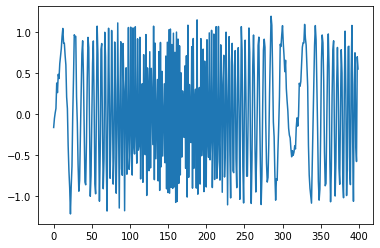

In [34]:
#synthetic dataset
noise = np.random.randn(400)*0.1
simplesine = np.sin(0.1*np.arange(400))
squaredsine = np.sin((0.1*np.arange(400))**2)

series = squaredsine + noise
plt.plot(series)

In [35]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape",Y.shape)

X.shape: (390, 10, 1) Y.shape (390,)


In [43]:
#RNN Model
i = Input(shape = (T,1))
x = LSTM(5)(i)  #Try None, 'relu','tanh' with SimpleRNN, as well as LSTM
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))

In [44]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 59ms/step - loss: 0.5985 - val_loss: 0.5434
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 0.4847 - val_loss: 0.5338
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.4857 - val_loss: 0.5131
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.4134 - val_loss: 0.5261
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.3580 - val_loss: 0.5149
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3181 - val_loss: 0.5103
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2998 - val_loss: 0.3727
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2777 - val_loss: 0.3919
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2326 - val_loss: 0.3025
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.1822 - val_loss: 0.2503
Epoch 11/80
7/7 [=====================

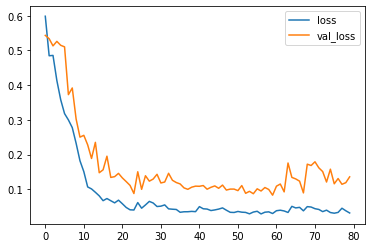

In [45]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [46]:
#Linear Forecast using true targets

target = Y[-N//2:]
predictions = []

# index of first validation input
i = -N//2

while len(predictions) < len(target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  predictions.append(p)

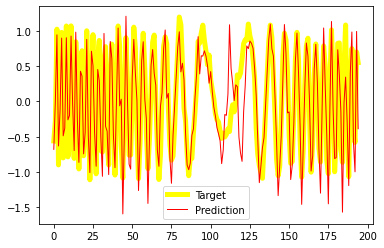

In [47]:
plt.plot(target,label="Target",linewidth=5,c='yellow')
plt.plot(predictions,label="Prediction",c='red',linewidth=1)
plt.legend()

In [48]:
#Forecast using forecasted values
target = Y[-N//2:]
predictions = []

last_x = X[-N//2]

while len(predictions) < len(target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]
  predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

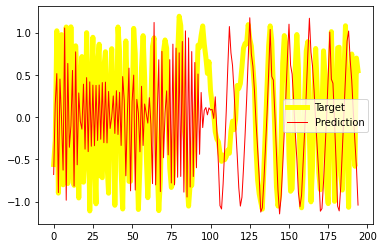

In [49]:
plt.plot(target,label="Target",linewidth=5,c='yellow')
plt.plot(predictions,label="Prediction",c='red',linewidth=1)
plt.legend()